## Set up kaggle files

In [46]:
! pip install -q kaggle

In [ ]:
!kaggle datasets download -d muhammadkhalid/sign-language-for-numbers

 75% 36.0M/48.1M [00:00<00:00, 68.0MB/s]
100% 48.1M/48.1M [00:00<00:00, 121MB/s] 


In [ ]:
!unzip \*.zip && rm *.zip

# Start working on data
Import packages

Using this notebook as reference: https://www.kaggle.com/muhammadkhalid/sign-language-model-training-for-numbers

In [47]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import cv2 
import os

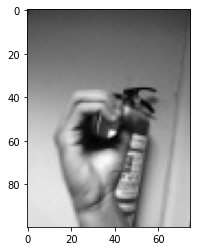

In [49]:
DATADIR = "/content/Sign Language for Numbers/"
CATEGORIES = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "unknown"]

for category in CATEGORIES:
    path = os.path.join(DATADIR,category)  # create path to categories
    for img in os.listdir(path):
      # iterate over each image
      # convert to array
      img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
      plt.imshow(img_array, cmap='gray')  # graph it
      plt.show()  # display!

      break  # we just want one for now so break
    break  #...and one more!

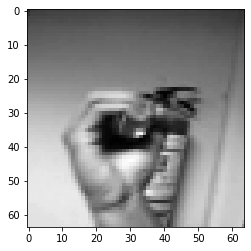

In [80]:
IMG_SIZE = 64

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show() # Show resize image

##Set Training & Test Data

In [81]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do 0,1,2,3, .....

        path = os.path.join(DATADIR,category)  # create path to categories
        class_num = CATEGORIES.index(category)  # get the classification

        for img in tqdm(os.listdir(path)):  # iterate over each image
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            
create_training_data() # call function

100%|██████████| 1500/1500 [00:00<00:00, 5669.21it/s]


## Shuffle the files

In [82]:
import random
random.shuffle(training_data)

# Check
for sample in training_data[:10]:
    print(sample[1])


4
4
8
2
8
1
1
3
2
1


## Add the data into an X & Y list

X = features
Y = label

In [ ]:
X = []
Y = []

for features,label in training_data:
    X.append(features)
    Y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

##Pickle the data

In [84]:
import pickle

pickle_out = open("/content/Kaggle/Working/X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("/content/Kaggle/Working/Y.pickle","wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

In [85]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import time

import pickle

In [86]:
NAME = "Numbers-CNN-Model-{}".format(str(time.ctime())) # Model Name

In [87]:
# Load pickel data
pickle_in = open("/content/Kaggle/Working/X.pickle","rb")
X = pickle.load(pickle_in)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

pickle_in = open("/content/Kaggle/Working/Y.pickle","rb")
Y = pickle.load(pickle_in)
Y = np.array(Y)

X = X/255.0

## Train the model

In [88]:
model = Sequential()

model.add(Conv2D(16, (2,2), input_shape=X.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding='same'))
model.add(Conv2D(64, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(5, 5), strides=(5, 5), padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(11, activation='softmax')) # size must be equal to number of classes i.e. 11

tensorboard = TensorBoard(log_dir="/kaggle/working/logs/{}".format(NAME))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, Y, batch_size=32, epochs=10, validation_split=0.2, callbacks=[tensorboard])

Epoch 1/10
413/413 [==============================] - 41s 99ms/step - loss: 2.0802 - accuracy: 0.2559 - val_loss: 0.7234 - val_accuracy: 0.7897
Epoch 2/10
413/413 [==============================] - 39s 95ms/step - loss: 0.7095 - accuracy: 0.7754 - val_loss: 0.4274 - val_accuracy: 0.8697
Epoch 3/10
413/413 [==============================] - 42s 102ms/step - loss: 0.3975 - accuracy: 0.8710 - val_loss: 0.3217 - val_accuracy: 0.8994
Epoch 4/10
413/413 [==============================] - 40s 97ms/step - loss: 0.2531 - accuracy: 0.9233 - val_loss: 0.2737 - val_accuracy: 0.9127
Epoch 5/10
413/413 [==============================] - 41s 100ms/step - loss: 0.1831 - accuracy: 0.9418 - val_loss: 0.1977 - val_accuracy: 0.9361
Epoch 6/10
413/413 [==============================] - 40s 97ms/step - loss: 0.1359 - accuracy: 0.9568 - val_loss: 0.2226 - val_accuracy: 0.9324
Epoch 7/10
413/413 [==============================] - 41s 99ms/step - loss: 0.1139 - accuracy: 0.9638 - val_loss: 0.2467 - val_accurac

In [89]:
model.save("/content/Kaggle/Working/{}.model".format(NAME))

INFO:tensorflow:Assets written to: /content/Kaggle/Working/Numbers-CNN-Model-Fri Mar  5 19:25:25 2021.model/assets


##Training Conclusion
Overall the model has 98% Accuracy when predicting numbers

# Let's Test the model

In [147]:
def testCNNModel(path,model):
    im1 =cv2.imread(path,0)
    im1 = cv2.resize(im1,(64,64))
    t = []
    t.append(im1.reshape(64,64))
    t = np.asarray(t)
    t = t.reshape(1,64,64,1)
    res = model.predict(t)
    for i in range(len(res[0])):
      if res[0][i]==1:
        if i == 10:
          return "Unknown"
        else:
          return i
    return "None"

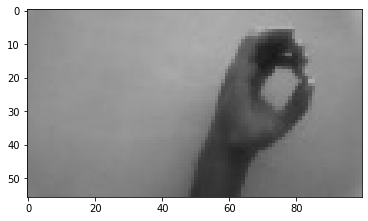

In [136]:
DATADIR = '/content/Sign Language for Numbers/0/zero_1004.jpg'
img_array = cv2.imread(DATADIR)  
plt.imshow(img_array)  # graph it
plt.show()  # display!

In [148]:
testCNNModel('/content/Sign Language for Numbers/0/zero_1004.jpg',model)

0

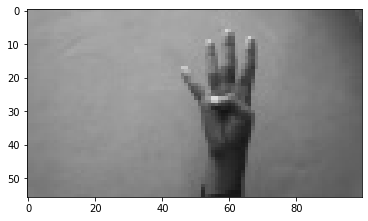

In [125]:
DATADIR = '/content/Sign Language for Numbers/4/four_1004.jpg'
img_array = cv2.imread(DATADIR)  
plt.imshow(img_array)  # graph it
plt.show()  # display!

In [149]:
testCNNModel('/content/Sign Language for Numbers/4/four_1004.jpg',model)

4

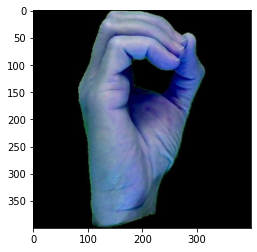

In [124]:
DATADIR = '/content/hand1_0_bot_seg_1_cropped.jpeg'
img_array = cv2.imread(DATADIR)  
plt.imshow(img_array)  # graph it
plt.show()  # display!

In [150]:
testCNNModel('/content/hand1_0_bot_seg_1_cropped.jpeg',model)

0

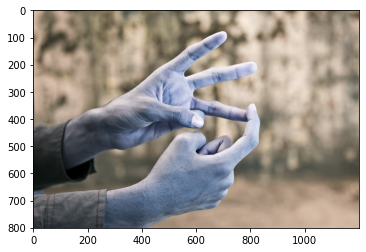

In [132]:
DATADIR = '/content/sign-language-main.jpg'
img_array = cv2.imread(DATADIR)  
plt.imshow(img_array)  # graph it
plt.show()  # display!

In [151]:
testCNNModel('/content/sign-language-main.jpg',model)

'Unknown'